# Model Evaluation

This notebook evaluates the trained deep learning model on unseen test data.
Due to class imbalance, performance is measured using Recall (Sensitivity)
and ROC–AUC rather than accuracy.


## Imports

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    recall_score,
    roc_auc_score,
    roc_curve
)

## Load Model and Test Data

In [3]:
X_test=pd.read_csv("../data/processed/X_test.csv")
y_test=pd.read_csv("../data/processed/y_test.csv").values.ravel()

model=load_model("../models/loan_default_model.h5")

## Generate Predictions

In [4]:
y_prob=model.predict(X_test).ravel()
y_prob[:10]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0.5638848 , 0.25194666, 0.52369237, 0.5124872 , 0.5787833 ,
       0.73374176, 0.6122815 , 0.45352966, 0.5456498 , 0.5349771 ],
      dtype=float32)

## Classification

In [5]:
y_pred = (y_prob >= 0.5).astype(int)

In [6]:
y_pred

array([1, 0, 1, ..., 0, 0, 0], shape=(1916,))

## Metrics

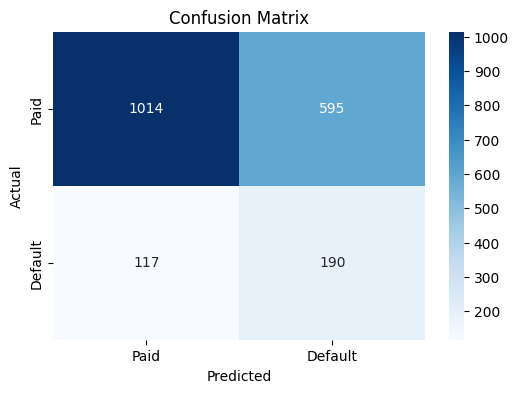

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Paid", "Default"],
            yticklabels=["Paid", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
recall=recall_score(y_test,y_pred)
recall

0.6188925081433225

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1609
           1       0.24      0.62      0.35       307

    accuracy                           0.63      1916
   macro avg       0.57      0.62      0.54      1916
weighted avg       0.79      0.63      0.68      1916



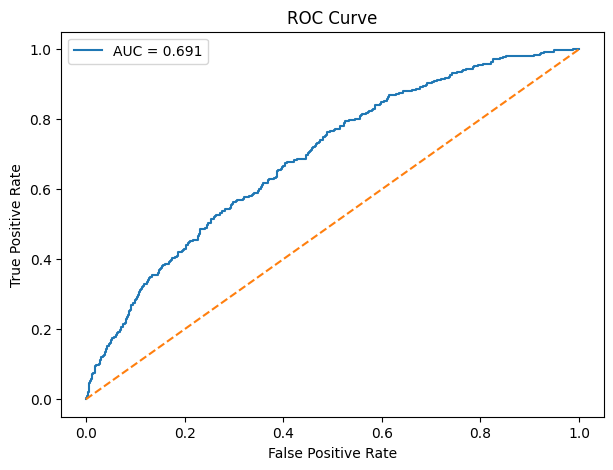

AUC = 0.691


In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC = {auc_score:.3f}")
